# FSL Feat 3

In [1]:
import glob, os, re
import time
import subprocess as sp
import multiprocessing as mp
import subprocess
import pandas as pd
import shutil
from nilearn.plotting import plot_stat_map, plot_anat, plot_img
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import ipywidgets as widgets
from IPython.display import display
from IPython.html.widgets import interactive
plt.rcParams["figure.figsize"] = (40,20)


/projects/niblab/modules/software/miniconda3/miniconda3/lib/python3.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
def make_dict(cope_dict,x):
    cope_dict[x] = {}


def make_fsfs(num_of_copes, num_of_input, template_file,
              deriv_dir, cope_dict, dropped_subjects, preproc_folder):#, remove_subjects=remove_subjects):

    # loop through copes and make design file for each
    for cope_num in range(1, num_of_copes+1):
        
        make_dict(cope_dict, cope_num)
        
        session = 'ses-1'

        #OUTPUTDIR = os.path.join(deriv_dir, 'group_ana/cope%s_ses-1'%cope_num)
        OUTPUTDIR = os.path.join('/projects/niblab/experiments/bbx/data/fsl_feat3/%s/%s_results/%s_task-training_n141'%(session,tag, cope_num))
        
        

        # open and fill template file
        with open(template_file, 'r') as infile:
            tempfsf=infile.read()
            tempfsf = tempfsf.replace("OUTPUT", OUTPUTDIR)
            """for input_title in sorted(cope_dict[cope_num]):
                input_ = cope_dict[cope_num][input_title]
                #print("\nTITLE: \t{} \n\nINPUT: \t{}".format(input_title,input_))
                input_match = re.compile(r"\b%s\b"%(input_title))
                #print(input_match)
                tempfsf = re.sub(r"\b%s\b"%(input_title), input_, tempfsf)
                tempfsf = tempfsf.replace("%s"%input_match, input_)"""
            
            
            OUTFILE_PATH = os.path.join(
                '/projects/niblab/experiments/bbx/data/fsl_feat3/ses-1/GM_mask/%s_ses-1_%s.fsf'%(cope_name, 'task-training'))
            
            #print(tempfsf)
            with open(OUTFILE_PATH, 'w') as outfile:
                #print("[INFO] Writing output file: ", OUTFILE_PATH)
                outfile.write(tempfsf)
            outfile.close()
        infile.close()
    print("[INFO] Complete. ")


In [3]:


def make_dict(cope_dict,x):
    cope_dict[x] = {}


def make_fsfs(num_of_copes, num_of_input, template_file,
              deriv_dir, cope_dict, dropped_subjects, preproc_folder):#, remove_subjects=remove_subjects):

    # loop through copes and make design file for each
    for cope_num in range(1, num_of_copes+1):
        
        # make dictionary
        make_dict(cope_dict, cope_num)
        if cope_num == 1:
            cope_name = 'c%s_ssbcue_%s'%(cope_num,num_of_input)
        elif cope_num == 2:
            cope_name = 'c%s_usbcue_%s'%(cope_num,num_of_input)
        elif cope_num == 3:
            cope_name = 'c%s_h2Ocue_%s'%(cope_num,num_of_input)
        elif cope_num == 4:
            cope_name = 'c%s_ssbtaste_%s'%(cope_num,num_of_input)
        elif cope_num == 5:
            cope_name = 'c%s_usbtaste_%s'%(cope_num,num_of_input)
        elif cope_num == 6:
            cope_name = 'c%s_h2Otaste_%s'%(cope_num,num_of_input)
        elif cope_num == 7:
            cope_name = 'c%s_rinse_%s'%(cope_num,num_of_input)
        elif cope_num == 8:
            cope_name = 'c%s_ssbcue_h2Ocue_%s'%(cope_num,num_of_input)
        elif cope_num == 9:
            cope_name = 'c%s_usbcue_h2Ocue_%s'%(cope_num,num_of_input)
        elif cope_num == 10:
            cope_name = 'c%s_ssbcue_rinse_%s'%(cope_num,num_of_input)
        elif cope_num == 11:
            cope_name = 'c%s_ssbtaste_rinse_%s'%(cope_num,num_of_input)
        elif cope_num == 12:
            cope_name = 'c%s_usbtaste_rinse_%s'%(cope_num,num_of_input)
        elif cope_num == 13:
            cope_name = 'c%s_ssbtaste_usbtaste_%s'%(cope_num,num_of_input)
        elif cope_num == 14:
            cope_name = 'c%s_ssbtaste_h2Otaste_%s'%(cope_num,num_of_input)
        elif cope_num == 15:
            cope_name = 'c%s_usbtaste_h2Otaste_%s'%(cope_num,num_of_input)
        elif cope_num == 16:
            cope_name = 'c%s_h2Otaste_rinse_%s'%(cope_num,num_of_input)
        else: 
            cope_name=cope

        session = 'ses-1'

        #OUTPUTDIR = os.path.join(deriv_dir, 'group_ana/cope%s_ses-1'%cope_num)
        OUTPUTDIR = os.path.join('/projects/niblab/experiments/bbx/data/fsl_feat3/%s/GM_mask/%s_%s_task-training'%(session,cope_name, session))
        
        
        
        COPES = glob.glob(os.path.join(preproc_folder, 'sub-*',
                                       session, 'fsl_feat2/sub-*_ses-1_task-training.gfeat/cope%s.feat'%cope_num))
        COPES.sort()
        #COPES = [ x for x in COPES if x.split("/")[-5] not in dropped_subjects]

        #print("[INFO]REPLACING 'OUTPUT' > %s"%OUTPUTDIR)
        #print("RUNNING ON SESSION ", sess )
        #COPES = glob.glob(os.path.join('/projects/niblab/experiments/bbx/data/preprocessed/sub-*',
         #                              session,'fsl_feat2/sub-*task-training*.gfeat/cope%s.feat'%cope_num))
    
        
        print("[INFO] %s subjects found."%len(COPES))
        #print([x.split('/')[-5] for x in COPES])
        # fill dictionary
        for x,cope in enumerate(COPES):
            count=int(x)+1
            #print(count)
            if count > 9:
                INPUTX = "INPUT_%i"%(count)
            else:
                INPUTX = "INPUT%i"%(count)
            cope_dict[cope_num][INPUTX] = cope
            
            #print("%s : \t%s"%(INPUTX,cope))
        #print(cope_dict)
        
        # open and fill template file
        with open(template_file, 'r') as infile:
            tempfsf=infile.read()
            tempfsf = tempfsf.replace("OUTPUT", OUTPUTDIR)
            """for input_title in sorted(cope_dict[cope_num]):
                input_ = cope_dict[cope_num][input_title]
                #print("\nTITLE: \t{} \n\nINPUT: \t{}".format(input_title,input_))
                input_match = re.compile(r"\b%s\b"%(input_title))
                #print(input_match)
                tempfsf = re.sub(r"\b%s\b"%(input_title), input_, tempfsf)
                tempfsf = tempfsf.replace("%s"%input_match, input_)"""
            
            
            OUTFILE_PATH = os.path.join(
                '/projects/niblab/experiments/bbx/data/fsl_feat3/ses-1/GM_mask/%s_ses-1_%s.fsf'%(cope_name, 'task-training'))
            
            #print(tempfsf)
            with open(OUTFILE_PATH, 'w') as outfile:
                #print("[INFO] Writing output file: ", OUTFILE_PATH)
                outfile.write(tempfsf)
            outfile.close()
        infile.close()
    print("[INFO] Complete. ")


In [4]:
def model3_setup(num_of_copes, num_of_input, template_file, deriv_dir,
                 preproc_folder, outdir,mask, ses):
    
    
    drop=[ 'sub-052', 'sub-091', 'sub-127', 'sub-128',  'sub-157',
      'sub-164', 'sub-168', 'sub-169', 'sub-170']
    
    mask=mask
    # loop through copes and make design file for each
    
    for cope_num in range(1, num_of_copes+1):
        cope_num
        session = 'ses-1'        

        #OUTPUTDIR = os.path.join(deriv_dir, 'group_ana/cope%s_ses-1'%cope_num)
        OUTPUTDIR = os.path.join(outdir, 'c%s_%s_task-training_n%s'%(cope_num, ses, str(num_of_input)))
        
        # grab the feat folders
        feats=glob.glob("/projects/niblab/experiments/bbx/data/preprocessed/subs_trimmed/sub-*/ses-1/fsl_feat2/*task-training_19contrasts.gfeat/cope%s.feat"%cope_num)
        feats=[x for x in feats if x.split("/")[-5] not in drop ]#and  x.split("/")[-5] not in all_bad]
        #print(len(feats))
        feats=[x for x in feats]
        feats.sort()
        
        
        folders=[]
        i=1
        for x in feats:
            string_temp='set feat_files(%s) "%s"'%(i, x)
            i+=1
            folders.append(string_temp)

            
        string1='\n'.join(folders)
        #print(string1)
                    
        OUTFILE_PATH = os.path.join(outdir, 'c%s_%s_%s_n%s.fsf'%(cope_num, ses, 'task-training', str(num_of_input)))
        print(OUTFILE_PATH)
        
        # open and fill template file
        with open(template_file, 'r') as infile:
            tempfsf=infile.read()
            
            # fill files
            tempfsf = tempfsf.replace("OUTFOLDER", OUTPUTDIR)
            tempfsf = tempfsf.replace("DATASET", string1)
            tempfsf = tempfsf.replace("MASK", mask)
            
            #print(tempfsf)
            with open(OUTFILE_PATH, 'w') as outfile:
                #print("[INFO] Writing output file: ", OUTFILE_PATH)
                outfile.write(tempfsf)
            outfile.close()
        infile.close()
    print("[INFO] Complete. ")

In [5]:
def model3_main():
    # SET OUR RELEVANT PATHS
    deriv_dir = "/projects/niblab/experiments/bbx/data/preprocessed"
    preproc_folder='/projects/niblab/experiments/bbx/data/preprocessed/subs_trimmed'
    template_file = os.path.join(
    '/projects/niblab/experiments/bbx/data/preprocessed/fsl_feat3/ses-1/model3.fsf')
    outdir='/projects/niblab/experiments/bbx/data/preprocessed/fsl_feat3/ses-1/may2021_results'
    mask='/projects/niblab/experiments/bbx/data/masks/BBX_GM152asym_mask_3x3x3_final_V3.nii.gz'
    ses='ses-1'
    #  get the number of cope files to make (# of copes)
    num_of_copes = 19
    num_of_input = 141
    #cope_dict = {}
    model3_setup(num_of_copes, num_of_input, template_file, 
                 deriv_dir, preproc_folder,outdir, mask, ses)

In [6]:
model3_main()

/projects/niblab/experiments/bbx/data/preprocessed/fsl_feat3/ses-1/may2021_results/c1_ses-1_task-training_n141.fsf
/projects/niblab/experiments/bbx/data/preprocessed/fsl_feat3/ses-1/may2021_results/c2_ses-1_task-training_n141.fsf
/projects/niblab/experiments/bbx/data/preprocessed/fsl_feat3/ses-1/may2021_results/c3_ses-1_task-training_n141.fsf
/projects/niblab/experiments/bbx/data/preprocessed/fsl_feat3/ses-1/may2021_results/c4_ses-1_task-training_n141.fsf
/projects/niblab/experiments/bbx/data/preprocessed/fsl_feat3/ses-1/may2021_results/c5_ses-1_task-training_n141.fsf
/projects/niblab/experiments/bbx/data/preprocessed/fsl_feat3/ses-1/may2021_results/c6_ses-1_task-training_n141.fsf
/projects/niblab/experiments/bbx/data/preprocessed/fsl_feat3/ses-1/may2021_results/c7_ses-1_task-training_n141.fsf
/projects/niblab/experiments/bbx/data/preprocessed/fsl_feat3/ses-1/may2021_results/c8_ses-1_task-training_n141.fsf
/projects/niblab/experiments/bbx/data/preprocessed/fsl_feat3/ses-1/may2021_resul

In [7]:
design_files=glob.glob('/projects/niblab/experiments/bbx/data/preprocessed/fsl_feat3/ses-1/may2021_results/c*n141.fsf')

In [9]:

#design_file="/projects/niblab/experiments/bbx/data/preprocessed/fsl_feat3/ses-1/may2021_results/c10_task-training_n141.fsf"

for file in design_files:
    fslfeat_cmd=['feat', file,'&']
    sp.run(' '.join(fslfeat_cmd), shell=True) 
    print('[INFO] running model ', ' '.join(fslfeat_cmd))


[INFO] running model  feat /projects/niblab/experiments/bbx/data/preprocessed/fsl_feat3/ses-1/may2021_results/c1_ses-1_task-training_n141.fsf &
[INFO] running model  feat /projects/niblab/experiments/bbx/data/preprocessed/fsl_feat3/ses-1/may2021_results/c2_ses-1_task-training_n141.fsf &
[INFO] running model  feat /projects/niblab/experiments/bbx/data/preprocessed/fsl_feat3/ses-1/may2021_results/c3_ses-1_task-training_n141.fsf &
[INFO] running model  feat /projects/niblab/experiments/bbx/data/preprocessed/fsl_feat3/ses-1/may2021_results/c4_ses-1_task-training_n141.fsf &
[INFO] running model  feat /projects/niblab/experiments/bbx/data/preprocessed/fsl_feat3/ses-1/may2021_results/c5_ses-1_task-training_n141.fsf &
[INFO] running model  feat /projects/niblab/experiments/bbx/data/preprocessed/fsl_feat3/ses-1/may2021_results/c6_ses-1_task-training_n141.fsf &
[INFO] running model  feat /projects/niblab/experiments/bbx/data/preprocessed/fsl_feat3/ses-1/may2021_results/c7_ses-1_task-training_n14

In [3]:
feats=glob.glob("/projects/niblab/experiments/bbx/data/preprocessed/subs_trimmed/sub-*/ses-1/fsl_feat2/*.gfeat")
feats.sort()

In [3]:
def main():
    # SET OUR RELEVANT PATHS
    deriv_dir = "/projects/niblab/experiments/bbx/data/preprocessed"
    #cope_dict[x] = {}
    preproc_folder='/projects/niblab/experiments/bbx/data/preprocessed/subs_trimmed'
    
    template_file = os.path.join(
        '/projects/niblab/experiments/bbx/code/preprocessing/fsl_feat3/test147.fsf')

    
    dropped_subjects=["sub-091"]
    
    #  get the number of cope files to make (# of copes)
    num_of_copes = 16
    num_of_input = 147
    cope_dict = {}
    make_fsfs(num_of_copes, num_of_input, template_file, deriv_dir,
              cope_dict, dropped_subjects, preproc_folder)



In [22]:
main()

[INFO] 147 subjects found.
[INFO] 147 subjects found.
[INFO] 147 subjects found.
[INFO] 147 subjects found.
[INFO] 147 subjects found.
[INFO] 147 subjects found.
[INFO] 147 subjects found.
[INFO] 147 subjects found.
[INFO] 147 subjects found.
[INFO] 147 subjects found.
[INFO] 147 subjects found.
[INFO] 147 subjects found.
[INFO] 147 subjects found.
[INFO] 147 subjects found.
[INFO] 147 subjects found.
[INFO] Complete. 


---

In [11]:
all_bad=[ 'sub-073', 'sub-099', 'sub-115', 'sub-131', 'sub-140', 'sub-141', 'sub-142', 'sub-143',
           'sub-147', 'sub-151', 'sub-152', 'sub-153', 'sub-154', 'sub-156', 'sub-157', 'sub-160', 
           'sub-163', 'sub-164', 'sub-169', 'sub-170', 'sub-168']

In [12]:
less_runs=['sub-060', 'sub-002', 'sub-004', 'sub-031', 'sub-042', 'sub-048', 
           'sub-070', 'sub-073', 'sub-076', 'sub-079', 'sub-117', 'sub-128', 
           'sub-133', 'sub-146', 'sub-147', 'sub-148', 'sub-149', 'sub-156']


remove_subs=['sub-029', 'sub-047', 'sub-049', 'sub-069', 'sub-081', 'sub-094', 'sub-101',
             'sub-105', 'sub-106', 'sub-110', 'sub-113', 'sub-122', 'sub-125', 'sub-126', 
             'sub-139', 'sub-155', 'sub-158', 'sub-165']

s2_drop_subjects=["sub-003", 'sub-012','sub-016', 'sub-018',  "sub-020", "sub-024", "sub-025",'sub-026', 'sub-035',
                  "sub-052", 'sub-056', "sub-059", "sub-060", "sub-064","sub-074", "sub-076", "sub-077", 'sub-087',
                  'sub-108', "sub-147", "sub-150", "sub-167"]


In [13]:
partial_bad=[]

In [14]:
drop=[ 'sub-052', 'sub-127', 'sub-128',  'sub-157',
      'sub-164', 'sub-168', 'sub-169', 'sub-170']

In [31]:
feats=glob.glob("/projects/niblab/experiments/bbx/data/preprocessed/subs_trimmed/sub-*/ses-1/fsl_feat2/*task-training_19contrasts.gfeat/cope17.feat")

feats=[x for x in feats if x.split("/")[-5] not in drop ]#and  x.split("/")[-5] not in all_bad]
print(len(feats))
feats=[x for x in feats]
feats.sort()

141


In [32]:
subjects_processed=[]
i=1
for x in feats:
    print('set feat_files(%s) "%s"'%(i, x ))
    i+=1
    subjects_processed.append(x.split("/")[-5])

set feat_files(1) "/projects/niblab/experiments/bbx/data/preprocessed/subs_trimmed/sub-001/ses-1/fsl_feat2/sub-001_ses-1_task-training_19contrasts.gfeat/cope17.feat"
set feat_files(2) "/projects/niblab/experiments/bbx/data/preprocessed/subs_trimmed/sub-002/ses-1/fsl_feat2/sub-002_ses-1_task-training_19contrasts.gfeat/cope17.feat"
set feat_files(3) "/projects/niblab/experiments/bbx/data/preprocessed/subs_trimmed/sub-003/ses-1/fsl_feat2/sub-003_ses-1_task-training_19contrasts.gfeat/cope17.feat"
set feat_files(4) "/projects/niblab/experiments/bbx/data/preprocessed/subs_trimmed/sub-004/ses-1/fsl_feat2/sub-004_ses-1_task-training_19contrasts.gfeat/cope17.feat"
set feat_files(5) "/projects/niblab/experiments/bbx/data/preprocessed/subs_trimmed/sub-005/ses-1/fsl_feat2/sub-005_ses-1_task-training_19contrasts.gfeat/cope17.feat"
set feat_files(6) "/projects/niblab/experiments/bbx/data/preprocessed/subs_trimmed/sub-006/ses-1/fsl_feat2/sub-006_ses-1_task-training_19contrasts.gfeat/cope17.feat"
set 

In [56]:
print([x.split("/")[-5] for x in feats])

['sub-001', 'sub-002', 'sub-003', 'sub-004', 'sub-005', 'sub-006', 'sub-007', 'sub-008', 'sub-009', 'sub-010', 'sub-011', 'sub-012', 'sub-013', 'sub-014', 'sub-015', 'sub-016', 'sub-017', 'sub-018', 'sub-019', 'sub-020', 'sub-021', 'sub-022', 'sub-023', 'sub-024', 'sub-025', 'sub-026', 'sub-027', 'sub-028', 'sub-030', 'sub-031', 'sub-032', 'sub-033', 'sub-034', 'sub-035', 'sub-036', 'sub-037', 'sub-038', 'sub-039', 'sub-040', 'sub-041', 'sub-042', 'sub-043', 'sub-044', 'sub-045', 'sub-046', 'sub-048', 'sub-050', 'sub-051', 'sub-053', 'sub-054', 'sub-055', 'sub-056', 'sub-057', 'sub-058', 'sub-059', 'sub-060', 'sub-061', 'sub-062', 'sub-063', 'sub-064', 'sub-065', 'sub-066', 'sub-067', 'sub-068', 'sub-070', 'sub-071', 'sub-072', 'sub-073', 'sub-075', 'sub-076', 'sub-077', 'sub-078', 'sub-079', 'sub-080', 'sub-082', 'sub-083', 'sub-084', 'sub-085', 'sub-086', 'sub-087', 'sub-088', 'sub-089', 'sub-090', 'sub-092', 'sub-093', 'sub-095', 'sub-096', 'sub-097', 'sub-098', 'sub-099', 'sub-100'

In [137]:

"""
# FSL Volume Trimming 
"""

design_file="/projects/niblab/experiments/bbx/data/preprocessed/fsl_feat3/ses-1/design_m1.fsf"
fslfeat_cmd=['feat', design_file,'&']
process=sp.run(' '.join(fslfeat_cmd), 
               shell=True, check=True, stdout=sp.PIPE, universal_newlines=True) 

    
    

In [119]:
"""
# FSL Volume Trimming 
"""

design_file="/projects/niblab/experiments/bbx/data/preprocessed/fsl_feat3/ses-1/design.fsf"
fslfeat_cmd=['feat', design_file,'&']
process=sp.run(' '.join(fslfeat_cmd), 
               shell=True, check=True, stdout=sp.PIPE, universal_newlines=True)

    
    

In [15]:
sub_ids=[x.split("/")[-5] for x in feats]

In [38]:
print(g ood_list)

['sub-001', 'sub-002', 'sub-003', 'sub-004', 'sub-005', 'sub-006', 'sub-007', 'sub-008', 'sub-009', 'sub-010', 'sub-011', 'sub-012', 'sub-013', 'sub-014', 'sub-015', 'sub-016', 'sub-017', 'sub-018', 'sub-019', 'sub-020', 'sub-021', 'sub-022', 'sub-023', 'sub-024', 'sub-025', 'sub-026', 'sub-027', 'sub-028', 'sub-030', 'sub-031', 'sub-032', 'sub-033', 'sub-034', 'sub-035', 'sub-036', 'sub-037', 'sub-038', 'sub-039', 'sub-040', 'sub-041', 'sub-042', 'sub-043', 'sub-044', 'sub-045', 'sub-046', 'sub-048', 'sub-050', 'sub-051', 'sub-053', 'sub-054', 'sub-055', 'sub-056', 'sub-057', 'sub-058', 'sub-059', 'sub-060', 'sub-061', 'sub-062', 'sub-063', 'sub-064', 'sub-065', 'sub-066', 'sub-067', 'sub-068', 'sub-070', 'sub-071', 'sub-072', 'sub-073', 'sub-075', 'sub-076', 'sub-077', 'sub-078', 'sub-079', 'sub-080', 'sub-082', 'sub-083', 'sub-084', 'sub-085', 'sub-086', 'sub-087', 'sub-088', 'sub-089', 'sub-090', 'sub-092', 'sub-093', 'sub-095', 'sub-096', 'sub-097', 'sub-098', 'sub-100', 'sub-102'

In [11]:
from shutil import copy2

In [30]:
niftis=glob.glob("/projects/niblab/experiments/bbx/data/fsl_feat3/ses-1/GM_mask/c*.gfeat/cope1.feat/thresh_zstat1.nii.gz")

for nii in niftis:
    cope_id=nii.split("/")[-3].split("_")[0]
    newfile=cope_id+"_thresh_zstat1.nii.gz"
    newpath=os.path.join('/projects/niblab/experiments/bbx/data/fsl_feat3/ses-1_niftis',
                         newfile)
    print(newfile)
   
    copy2(nii, newpath)
print("[INFO] completed.") 


c1_thresh_zstat1.nii.gz
c14_thresh_zstat1.nii.gz
c2_thresh_zstat1.nii.gz
c3_thresh_zstat1.nii.gz
c4_thresh_zstat1.nii.gz
c5_thresh_zstat1.nii.gz
c7_thresh_zstat1.nii.gz
c6_thresh_zstat1.nii.gz
c8_thresh_zstat1.nii.gz
c9_thresh_zstat1.nii.gz
c10_thresh_zstat1.nii.gz
c11_thresh_zstat1.nii.gz
c12_thresh_zstat1.nii.gz
c13_thresh_zstat1.nii.gz
c15_thresh_zstat1.nii.gz
[INFO] completed.


---

In [41]:

filepath=os.path.join(datapath,
                        'c*.gfeat/cope1.feat/stats/zstat1.nii.gz')

tmaps=glob.glob(filepath)


In [46]:
tmaps[0]

'/projects/niblab/experiments/bbx/data/preprocessed/fsl_feat3/ses-1/may2021_results/c9_ses-1_task-training_n141.gfeat/cope1.feat/stats/zstat1.nii.gz'

In [56]:
tmaps[0][84:86]

'9_'

In [60]:
sorted(tmaps, key=lambda x: int(x.replace('/projects/niblab/experiments/bbx/data/preprocessed/fsl_feat3/ses-1/may2021_results/c', '').replace('_ses-1_task-training_n141.gfeat/cope1.feat/stats/zstat1.nii.gz', '')))


['/projects/niblab/experiments/bbx/data/preprocessed/fsl_feat3/ses-1/may2021_results/c1_ses-1_task-training_n141.gfeat/cope1.feat/stats/zstat1.nii.gz',
 '/projects/niblab/experiments/bbx/data/preprocessed/fsl_feat3/ses-1/may2021_results/c2_ses-1_task-training_n141.gfeat/cope1.feat/stats/zstat1.nii.gz',
 '/projects/niblab/experiments/bbx/data/preprocessed/fsl_feat3/ses-1/may2021_results/c3_ses-1_task-training_n141.gfeat/cope1.feat/stats/zstat1.nii.gz',
 '/projects/niblab/experiments/bbx/data/preprocessed/fsl_feat3/ses-1/may2021_results/c4_ses-1_task-training_n141.gfeat/cope1.feat/stats/zstat1.nii.gz',
 '/projects/niblab/experiments/bbx/data/preprocessed/fsl_feat3/ses-1/may2021_results/c5_ses-1_task-training_n141.gfeat/cope1.feat/stats/zstat1.nii.gz',
 '/projects/niblab/experiments/bbx/data/preprocessed/fsl_feat3/ses-1/may2021_results/c6_ses-1_task-training_n141.gfeat/cope1.feat/stats/zstat1.nii.gz',
 '/projects/niblab/experiments/bbx/data/preprocessed/fsl_feat3/ses-1/may2021_results/c7_

In [89]:
def plot_feat3(datapath):
    
    filepath=os.path.join(datapath,
                        'c*.gfeat/cope1.feat/stats/zstat1.nii.gz')
    
    nrows=5
    ncols=4
    
    tmaps=glob.glob(filepath)
    tmaps=sorted(tmaps, key=lambda x: int(x.replace('/projects/niblab/experiments/bbx/data/preprocessed/fsl_feat3/ses-1/may2021_results/c', '').replace('_ses-1_task-training_n141.gfeat/cope1.feat/stats/zstat1.nii.gz', '')))

    
    
    n=len(tmaps)
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(30,20))

    for midx, tmap in enumerate(tmaps):

        settings=axes[int(midx / ncols), int(midx % ncols)]

        cope=tmap.split("/")[-4].split("_")[0]

        title_str="ses-1 %s"%(cope)

        plotting.plot_glass_brain(tmap, colorbar=True, threshold=3.0, cmap='plasma',
                          axes=settings, black_bg=True,
                          plot_abs=False, display_mode='xz', title=title_str) 

    fig.delaxes(axes[4][3])
    fig.suptitle('model 3 contrasts | BBX session-1 training tasks', fontsize=30)
    plotting.show

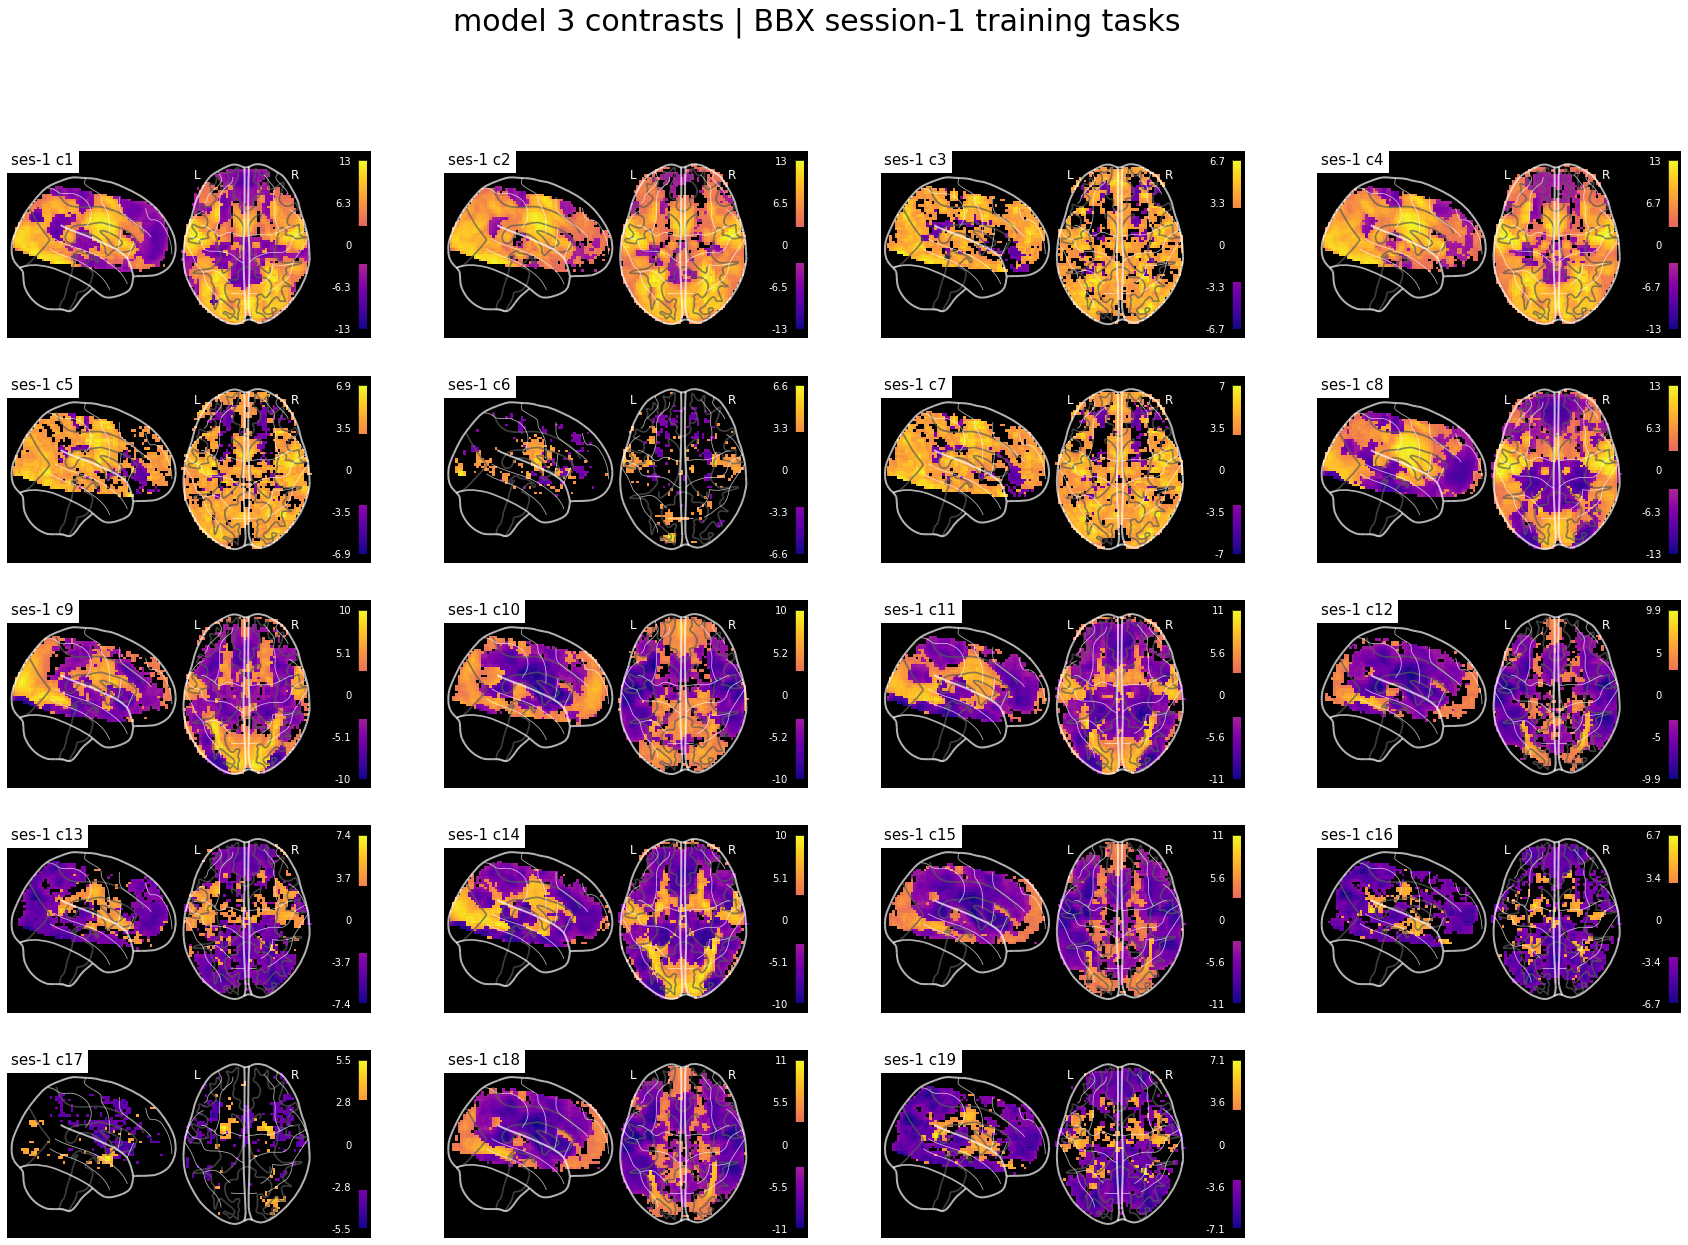

In [90]:
datapath='/projects/niblab/experiments/bbx/data/preprocessed/fsl_feat3/ses-1/may2021_results'

from nilearn import plotting
from scipy.stats import norm
plot_feat3(datapath)



---

In [10]:
copes=['c1','c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9',
       'c10', 'c11', 'c12', 'c13', 'c14', 'c15', 'c16', 'c17', 'c18', 'c19']

from nilearn import image, plotting


In [113]:
data_folder='/projects/niblab/experiments/bbx/data/preprocessed/fsl_feat3/ses-1/GM_mask/method1_results'
def display_zstat_m1(cope_id='c1'):
    stat_img=os.path.join(data_folder,
                      '%s_n141.gfeat/cope1.feat/stats/zstat1.nii.gz'%(cope_id))
        
    view = plotting.view_img(stat_img, threshold=3)

    display(view)



In [114]:
data_folder='/projects/niblab/experiments/bbx/data/preprocessed/fsl_feat3/ses-1/GM_mask/method2_results'
def display_zstat_m2(cope_id='c1'):
    stat_img=os.path.join(data_folder,
                      '%s_n141.gfeat/cope1.feat/stats/zstat1.nii.gz'%(cope_id))
    view = plotting.view_img(stat_img, threshold=3)
    display(view)


**Method 1**

In [115]:
w= widgets.Select(options=copes)
widgets.interactive(display_zstat_m1, cope_id=copes)


interactive(children=(Dropdown(description='cope_id', options=('c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8',…

**Method 2**

In [116]:
w= widgets.Select(options=copes)
widgets.interactive(display_zstat_m2, cope_id=copes)

interactive(children=(Dropdown(description='cope_id', options=('c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8',…

---